# Segmentation Study

# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

Reading the csv files for training and testing data and creating a new variable 'income' such that it is 0 for class '<=50K' and 1 for class '>50K' and then dropping the class variable 

In [2]:
train = pd.read_csv('au_train.csv',sep =',')
test =  pd.read_csv('au_test.csv',sep = ',')

In [3]:
train = train.sample(frac=1).reset_index(drop=True)
train['income'] = 0
train['income'][train['class'] == ' <=50K'] = 0
train['income'][train['class'] == ' >50K'] = 1

train = train.drop(['class'],axis = 1)

# Explanatory Data Analysis
Converting 'object' type variables into 'category'.

After having a look at the data it is evident that all the missing values are in the form of '?'

Replacing all the cells with '?' with 'Null' for further analysis



In [4]:
train[['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']] = train[['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']].astype('category') 
print(train.dtypes)
train.replace(' ?', np.nan, inplace= True)
train.isnull().sum(axis=0)

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income               int64
dtype: object


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

##  Missing values imputation

Number of missing values:

'workclass' = 1836

'occupation' = 1843

'native-country' = 583

Visualizing the distribution of age for all the rows where 'workclass', 'occupation' and both are null.

It is evident from the graphs that most of these null values lie in the 10-25 and the 60-70 age groups. 

Text(0.5, 1.0, 'Distribution of age for occupation & workclass=NULL')

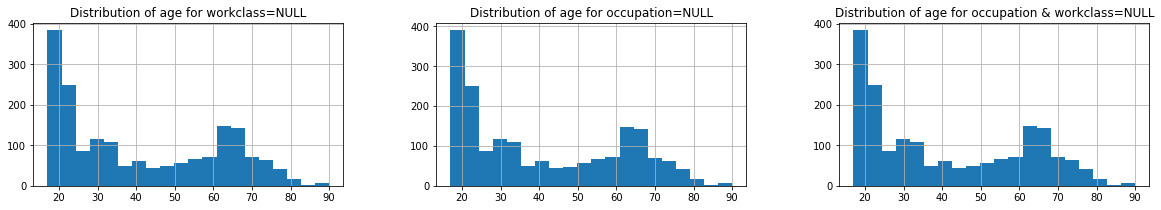

In [5]:
fig, axes = plt.subplots(1, 3,figsize=(20,3))
filter = train[["age","workclass"]]
filter2 = filter.loc[filter['workclass'].isnull()]
filter2.hist(bins=20,column='age',ax=axes[0])
filter3 = train[['age','occupation']]
filter3 = filter3.loc[filter3['occupation'].isnull()]
filter3.hist(bins=20,column='age',ax=axes[1])
filter4 = train[['age','workclass','occupation']]
filter4 = filter4.loc[filter4['workclass'].isnull()& (filter4['occupation'].isnull())]
filter4.hist(bins=20,column='age',ax=axes[2])
axes[0].set_title('Distribution of age for workclass=NULL')
axes[1].set_title('Distribution of age for occupation=NULL')
axes[2].set_title('Distribution of age for occupation & workclass=NULL')

As the number of such rows with null values is quite significant dropping them might hamper the performance of the models. Most null values belonging to the non-working age groups (10-25 and 60-70) and hence, we make the assumption that they have no workclass and no occupation(unemployed).

For rows with null value for 'native-country' we impute their native-country as 'Unknown'.

Hence, we set 'workclass'='None' and 'occupation'='Unemployed' for the rows with null valued for these variables respectively. 

In [6]:
train['workclass'] = train['workclass'].cat.add_categories('None')
train['workclass'].fillna('None', inplace =True) 
train['occupation'] = train['occupation'].cat.add_categories('Unemployed')
train['occupation'].fillna('Unemployed', inplace =True) 
train['native-country'] = train['native-country'].cat.add_categories('Unknown')
train['native-country'].fillna('Unknown', inplace =True)

## Correlation plot

None of the variables seem correlated

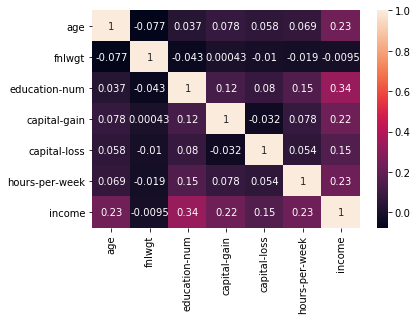

In [7]:
sns.heatmap(train.corr(),annot=True)

# Visualizing for segementation study

## Distribution of age by gender

Distribution of age is quite different for both sexes. For males, it is concentrated in the 30-50 age group while for females, it is concentrated in the 20-30 age group

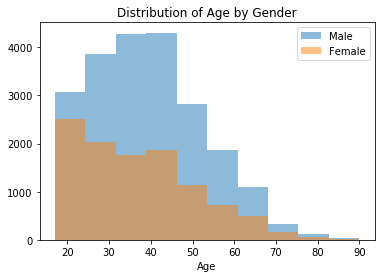

In [8]:
plt.hist('age', data=train[train['sex'] == ' Male'], alpha=0.5, label='Male')
plt.hist('age', data=train[train['sex'] == ' Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

## Distribution of training data by income

Number of people with income <=50K is quite large than that of people with >50K

Text(0, 0.5, 'Count')

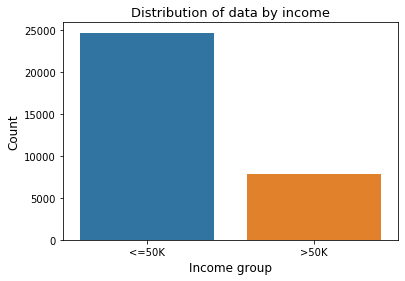

In [9]:
sns.countplot(x = "income",data = train)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by income',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of workclass

In both the income classes, most number of people belong to 'private' workclass.


Text(0, 0.5, 'Count')

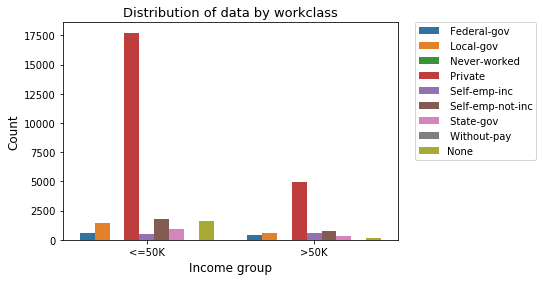

In [10]:
sns.countplot(x = "income",hue = "workclass",data = train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by workclass',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of marital-status

In the '<=50K' income class, most people are 'Never-married', followed by 'Married-civ-spouse' and 'Divorced'

In the '>50K' income class, most people belong to the 'Married-civ-spouse' class

The pattern indicates, people who are never married are most likely to earn less than 50K

Text(0, 0.5, 'Count')

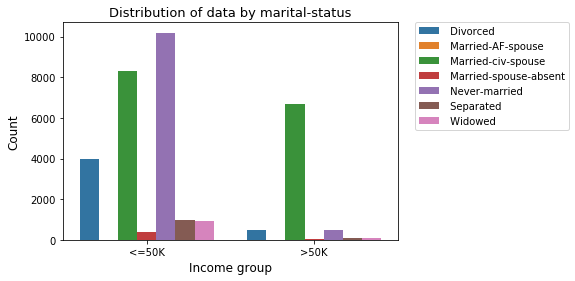

In [11]:
sns.countplot(x = "income",hue = "marital-status",data = train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by marital-status',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of education

From the plot we can see that the number of high-school grads in the '<=50K' category is much more than the others.

In the '>50K' class, the highest proportion of people have a bachelor's degree.

Hence people with a high-school degree are more likely to be in the lower income class while those with a bachelor's degree are more likely to earn more than 50K

Text(0, 0.5, 'Count')

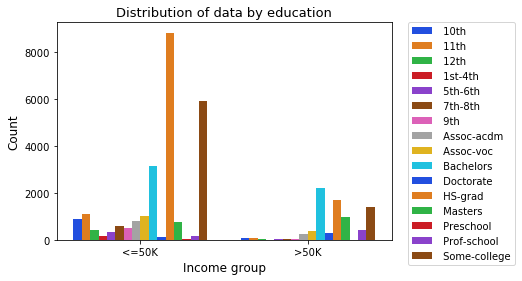

In [12]:
sns.countplot(x = "income",hue = "education",data = train,palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by education',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of occupation

In the lower income class, diferent occupations are fairly distributed with 'Adm-clerical' being the most prevalent occupation.

In the '>50K' class, most people have 'Exec-managerial' and 'Prof-specialty' occupations

Text(0, 0.5, 'Count')

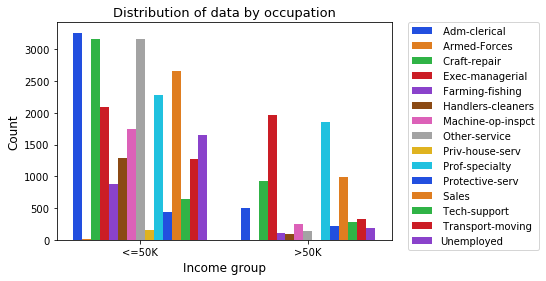

In [13]:
sns.countplot(x = "income",hue = "occupation",data = train,palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by occupation',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of race

Race: 'White' has the most number of observations in both the income classes

Text(0, 0.5, 'Count')

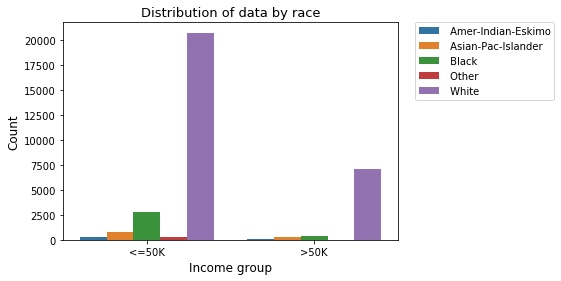

In [14]:
sns.countplot(x = "income",hue = "race",data = train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by race',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of sex

Males outnumber females in both the classes. However, in the lower income classes the number of females is comparable to the number of males to some extent. However, we see comparatively fewer females in the higher paying jobs.

Text(0, 0.5, 'Count')

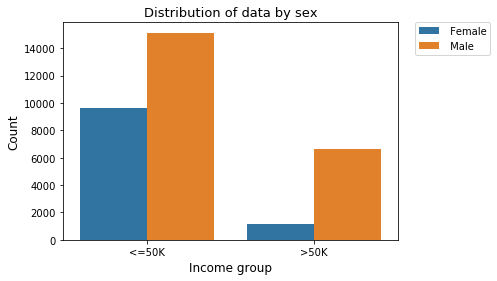

In [15]:
sns.countplot(x = "income",hue = "sex",data = train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by sex',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

## Distribution of native-country

The dataset has most number of people having U.S. origin. It constitutes 89% of the total data. 

We drop this variable from our dataset because USA having 89% of the observations, this variable might not add any significant information to our models

Text(0, 0.5, 'Count')

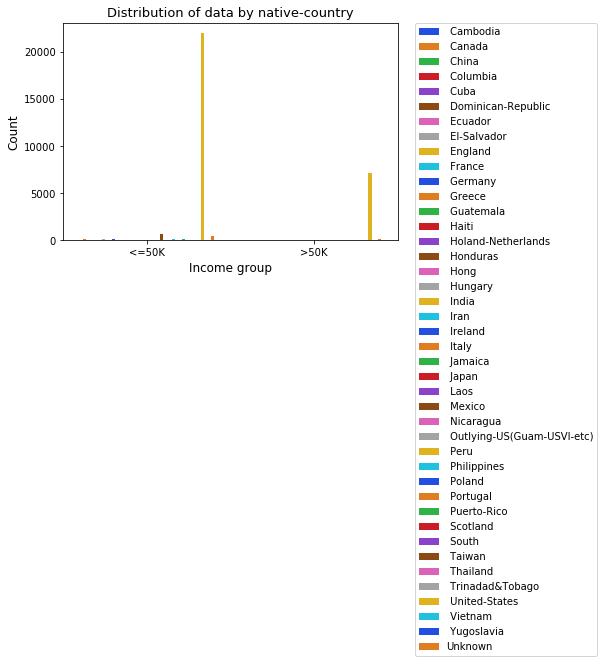

In [16]:
sns.countplot(x = "income",hue = "native-country",data = train,palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
positions = (0, 1)
labels = ("<=50K", ">50K")
plt.xticks(positions, labels)
plt.title('Distribution of data by native-country',fontsize=13)
plt.xlabel('Income group',fontsize=12)
plt.ylabel('Count',fontsize=12)

In [17]:
train['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
Unknown                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# Results(summary)

From all the above plots we can infer the following information:

(1)   Males form most of the population under study with the main age group being 30-50 years. For females it is 20-30 years

(2)   Number of people earning less than 50K are almost thrice of their counterparts i.e. people earning more than 50K

(3)   In both the income classes, most people belong to private workclass

(4)   In the lower earning class, highest percentage is of people who are never married. This may be contributed to the factor that this includes all the children/younger people. In the >50K class, most people are Married-civ-spouse

(5)   Highschool, Bachelor's Degree and Some college are the 3 main education categories for both income classes. But rightfully so, in the lower income class, highest percentage is of highschool grads while in the higher income class, it is of people with bachelor's degree

(6)   A lot of occupations are common in both the classes. However, in the <=50K class, clerical jobs are the most common while in the >50K class, managerial jobs are the most frequently found

(7)   People with race:white form a majority population of this study

(8)   In both the income classes, number of males dominate the number of females